In [34]:
import apc
import pandas as pd

In [35]:
import warnings
warnings.simplefilter('ignore',FutureWarning)

In [36]:
data1=pd.read_excel('hello/APC_input3.xlsx',sheet_name='cons',index_col=0)
data1

,1984,1989,1994,1999,2004,2009,2014
20,189738,216419,222376,222474,240871,214391,208079
25,214464,239756,259780,255069,264693,244514,244721
30,229027,260379,284900,273907,271173,268341,264612
35,250685,278387,310150,305388,285383,277422,273890
40,274493,309196,342825,339496,319730,304377,293279
45,311300,362024,410145,398969,380973,354878,331702
50,332249,384022,430353,428643,406448,382914,370718
55,322403,358767,403242,393574,380031,352143,364284
60,285147,313236,356426,356253,333662,319981,313961
65,248900,298151,328992,323616,309529,300190,293416


In [37]:
data2=pd.read_excel('hello/APC_input3.xlsx',sheet_name='unemp',index_col=0)
data2

,1984,1989,1994,1999,2004,2009,2014
20,3.8,3.8,5.0,9.3,10.3,9.9,7.3
25,2.3,2.1,3.1,5.6,6.9,7.7,5.6
30,2.1,1.5,2.1,3.8,4.6,5.7,4.1
35,1.8,1.5,1.8,3.1,3.8,4.6,3.5
40,1.6,1.2,1.9,3.1,3.4,4.1,3.2
45,1.5,1.4,1.7,3.0,3.1,3.7,3.1
50,1.9,1.3,1.9,3.4,3.8,4.0,2.7
55,4.0,2.6,2.5,4.4,4.1,4.7,3.4
60,6.7,5.9,7.2,10.2,7.1,6.3,4.3
65,2.2,1.5,1.9,2.9,2.6,3.3,2.6


In [38]:
model=apc.Model()
model.data_from_df(response=data1, rate=data2, data_format='AP')
#consumption becomes response

In [39]:
model.data_vector.head()
#could do without the dose

response           dose  rate
Period Age Cohort                               
1984   20  1964      189738   49931.052632   3.8
       25  1959      214464   93245.217391   2.3
       30  1954      229027  109060.476190   2.1
       35  1949      250685  139269.444444   1.8
       40  1944      274493  171558.125000   1.6

In [40]:
model._vector_to_array(model.data_vector['response'], space='AC').fillna('')

Cohort,1919,1924,1929,1934,1939,1944,1949,1954,1959,1964,1969,1974,1979,1984,1989,1994
Age,,,,,,,,,,,,,,,,
20,,,,,,,,,,189738,216419,222376,222474,240871,214391,208079
25,,,,,,,,,214464,239756,259780,255069,264693,244514,244721,
30,,,,,,,,229027,260379,284900,273907,271173,268341,264612,,
35,,,,,,,250685,278387,310150,305388,285383,277422,273890,,,
40,,,,,,274493,309196,342825,339496,319730,304377,293279,,,,
45,,,,,311300,362024,410145,398969,380973,354878,331702,,,,,
50,,,,332249,384022,430353,428643,406448,382914,370718,,,,,,
55,,,322403,358767,403242,393574,380031,352143,364284,,,,,,,
60,,285147,313236,356426,356253,333662,319981,313961,,,,,,,,


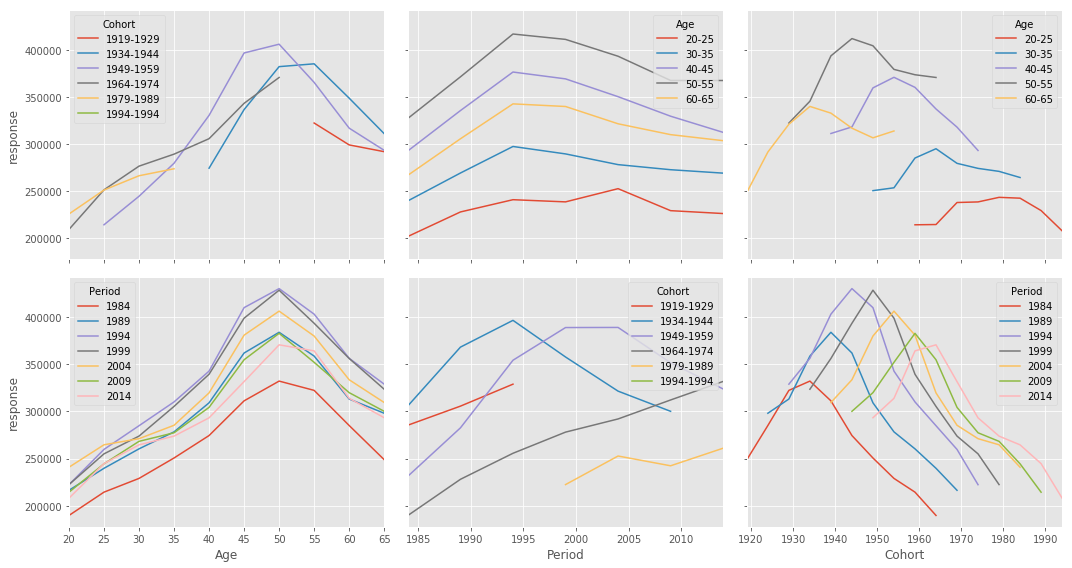

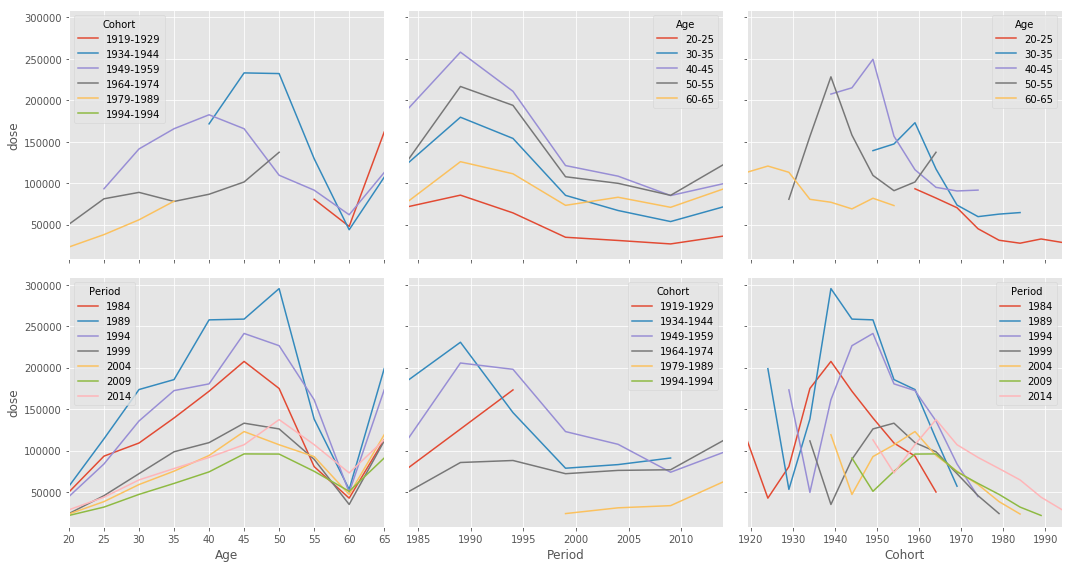

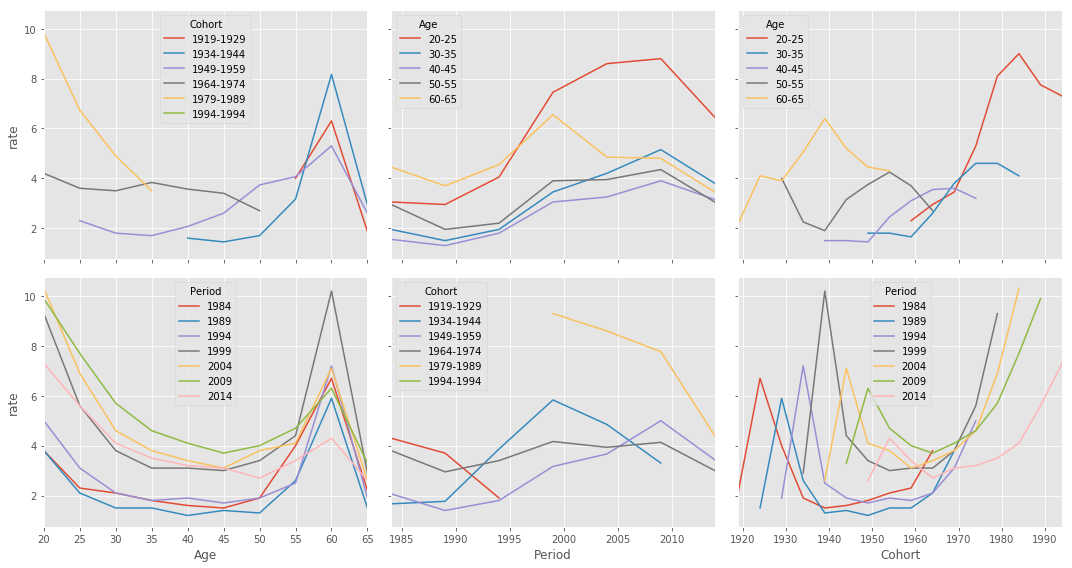

In [14]:
model.plot_data_within(figsize=(15,8),logy=False)
#age groups can not be grouped together 20-25, should be 20, 25, ...

In [43]:
model._vector_to_array(model.data_vector['rate'], space='AC').fillna('')

Cohort,1919,1924,1929,1934,1939,1944,1949,1954,1959,1964,1969,1974,1979,1984,1989,1994
Age,,,,,,,,,,,,,,,,
20,,,,,,,,,,3.8,3.8,5,9.3,10.3,9.9,7.3
25,,,,,,,,,2.3,2.1,3.1,5.6,6.9,7.7,5.6,
30,,,,,,,,2.1,1.5,2.1,3.8,4.6,5.7,4.1,,
35,,,,,,,1.8,1.5,1.8,3.1,3.8,4.6,3.5,,,
40,,,,,,1.6,1.2,1.9,3.1,3.4,4.1,3.2,,,,
45,,,,,1.5,1.4,1.7,3,3.1,3.7,3.1,,,,,
50,,,,1.9,1.3,1.9,3.4,3.8,4,2.7,,,,,,
55,,,4,2.6,2.5,4.4,4.1,4.7,3.4,,,,,,,
60,,6.7,5.9,7.2,10.2,7.1,6.3,4.3,,,,,,,,


In [44]:
model.fit('poisson_response_rate','APC')
model.deviance_table

ValueError: `family` not understood.